In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yahooFinance

In [16]:
sns.set_style('whitegrid') # background
get_ipython().magic(u'matplotlib inline')

In [17]:
# Reading stock data from the internet using pandas
import pandas_datareader.data as web

In [18]:
# Time stamps
from datetime import datetime

In [19]:
# Float numbers
from __future__ import division

## Fetch Data

In [229]:
# Stonks
stonks = ['NKE', 'AAPL', 'MSFT', 'DELL', 'CRWD', 'TM', 'NKE', 'U','COUR', 'ATVI']

In [230]:
# start and end date for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [231]:
stonk_data = {}

for stonk in stonks:
    stonk_data[stonk] = yahooFinance.download(stonk, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Single Stonk Analysis

In [232]:
stonk = stonks[0]
print(stonk)
sdf = stonk_data[stonk]
sdf.head()

NKE


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-16,97.500000,98.230003,97.040001,97.260002,96.459023,3594700
2020-07-17,96.949997,97.230003,96.040001,96.279999,95.487091,7405700
2020-07-20,95.500000,96.349998,95.110001,95.650002,94.862282,5822300
2020-07-21,96.919998,99.000000,96.099998,98.360001,97.549965,5855600
2020-07-22,98.160004,98.989998,97.910004,98.910004,98.095444,4097000


### Daily closing price

<function matplotlib.pyplot.show(close=None, block=None)>

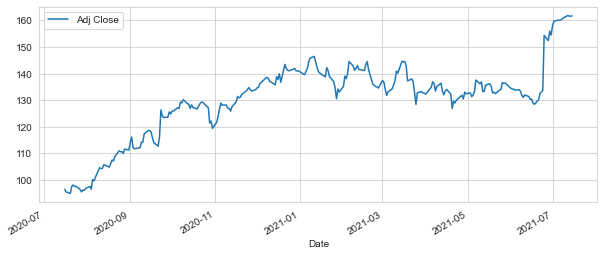

In [233]:
sdf['Adj Close'].plot(legend=True, figsize=(10,4))
plt.show

### Total daily volume

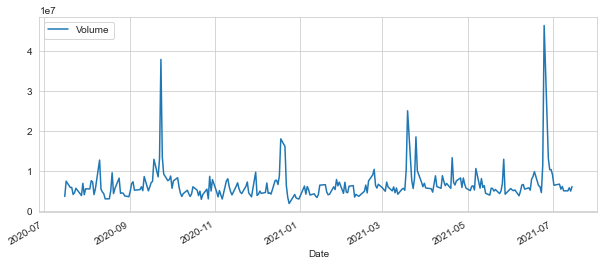

In [234]:
sdf['Volume'].plot(legend=True, figsize=(10,4))
plt.show()

In [235]:
# Calculate the moving average of the stock
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))

    sdf[column_name] = sdf['Adj Close'].rolling(window=ma).mean()

### Moving average of closing price

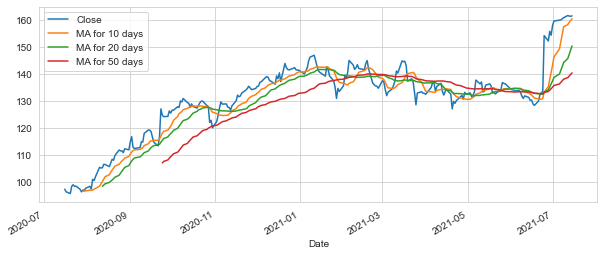

In [236]:
sdf[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
plt.show()

### Daily returns 

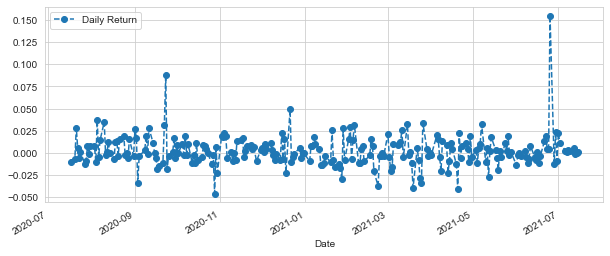

In [237]:
# Analyse daily returns of stonk
sdf['Daily Return'] = sdf['Adj Close'].pct_change()
sdf['Daily Return'].plot(figsize=(10, 4), legend=True, linestyle='--', marker='o')
plt.show()

### Avg daily return of the last year

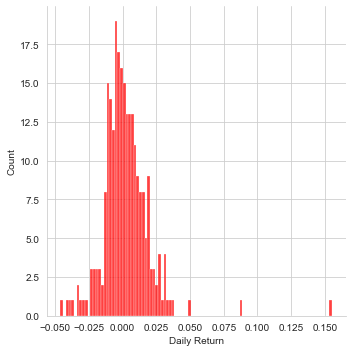

In [238]:
sns.displot(sdf['Daily Return'].dropna(), bins=100, color='red')
plt.show()

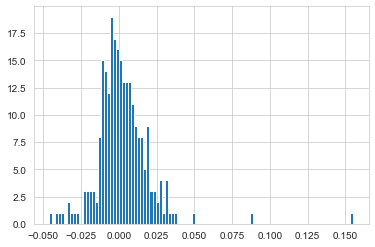

In [239]:
sdf['Daily Return'].hist(bins=100)
plt.show()

## Stonk List Analysis

In [240]:
df = yahooFinance.download(" ".join(stonks), start=start, end=end)
df.head()

[*********************100%***********************]  9 of 9 completed


Adj Close                                                     \
                 AAPL       ATVI COUR        CRWD       DELL        MSFT   
Date                                                                       
2020-07-16  95.876472  78.987556  NaN  101.059998  59.099998  201.964462   
2020-07-17  95.682777  78.261070  NaN  101.430000  60.369999  200.934448   
2020-07-20  97.699188  80.768929  NaN  106.720001  61.450001  209.570831   
2020-07-21  96.350784  80.370857  NaN  106.599998  61.060001  206.748154   
2020-07-22  96.621452  80.709213  NaN  103.709999  61.759998  209.719360   

                                           Close  ... Open     Volume  \
                  NKE          TM   U       AAPL  ...    U       AAPL   
Date                                              ...                   
2020-07-16  96.459023  126.489998 NaN  96.522499  ...  NaN  110577600   
2020-07-17  95.487091  127.059998 NaN  96.327499  ...  NaN   92186800   
2020-07-20  94.862282  127.279999 NaN  98.357498  ...  NaN   90318000   
2020-07-21  97.549965  126.269997 NaN  97.000000  ...  NaN  103433200   
2020-07-22  98.095444  126.260002 NaN  97.272499  ...  NaN   89001600   

                                                                            
               ATVI COUR     CRWD      DELL      MSFT      NKE      TM   U  
Date                                                                        
2020-07-16  4950100  NaN  5095900  25350200  29940700  3594700  212400 NaN  
2020-07-17  6241500  NaN  5725500   5674100  31635300  7405700  137000 NaN  
2020-07-20  5556400  NaN  5959200   3104100  36884800  5822300  145600 NaN  
2020-07-21  5495800  NaN  3626300   2762300  37990400  5855600  153000 NaN  
2020-07-22  2937400  NaN  3863700   2886700  49605700  4097000  104800 NaN  

[5 rows x 54 columns]

In [241]:
closing_df = df['Adj Close']
closing_df.head()

,AAPL,ATVI,COUR,CRWD,DELL,MSFT,NKE,TM,U
Date,,,,,,,,,
2020-07-16,95.876472,78.987556,NaN,101.059998,59.099998,201.964462,96.459023,126.489998,NaN
2020-07-17,95.682777,78.261070,NaN,101.430000,60.369999,200.934448,95.487091,127.059998,NaN
2020-07-20,97.699188,80.768929,NaN,106.720001,61.450001,209.570831,94.862282,127.279999,NaN
2020-07-21,96.350784,80.370857,NaN,106.599998,61.060001,206.748154,97.549965,126.269997,NaN
2020-07-22,96.621452,80.709213,NaN,103.709999,61.759998,209.719360,98.095444,126.260002,NaN


## Daily return 

In [242]:
daily_returns = closing_df.pct_change()
daily_returns.head()

,AAPL,ATVI,COUR,CRWD,DELL,MSFT,NKE,TM,U
Date,,,,,,,,,
2020-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-17,-0.002020,-0.009197,NaN,0.003661,0.021489,-0.005100,-0.010076,0.004506,NaN
2020-07-20,0.021074,0.032045,NaN,0.052154,0.017890,0.042981,-0.006543,0.001731,NaN
2020-07-21,-0.013802,-0.004929,NaN,-0.001124,-0.006347,-0.013469,0.028332,-0.007935,NaN
2020-07-22,0.002809,0.004210,NaN,-0.027111,0.011464,0.014371,0.005592,-0.000079,NaN


## Compare daily return of 2 stonks


/Users/aperkslabbe/opt/anaconda3/envs/stonk_analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


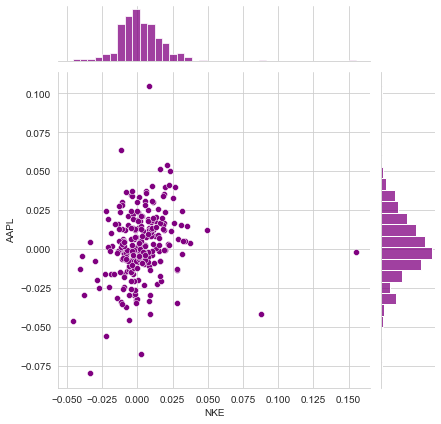

In [243]:
stonk1 = stonks[0]
stonk2 = stonks[1]
sns.jointplot(stonk1, stonk2, daily_returns, kind='scatter', color='purple')

## Compare daily return of multiple stonks

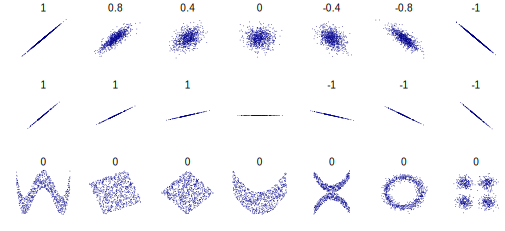

In [226]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

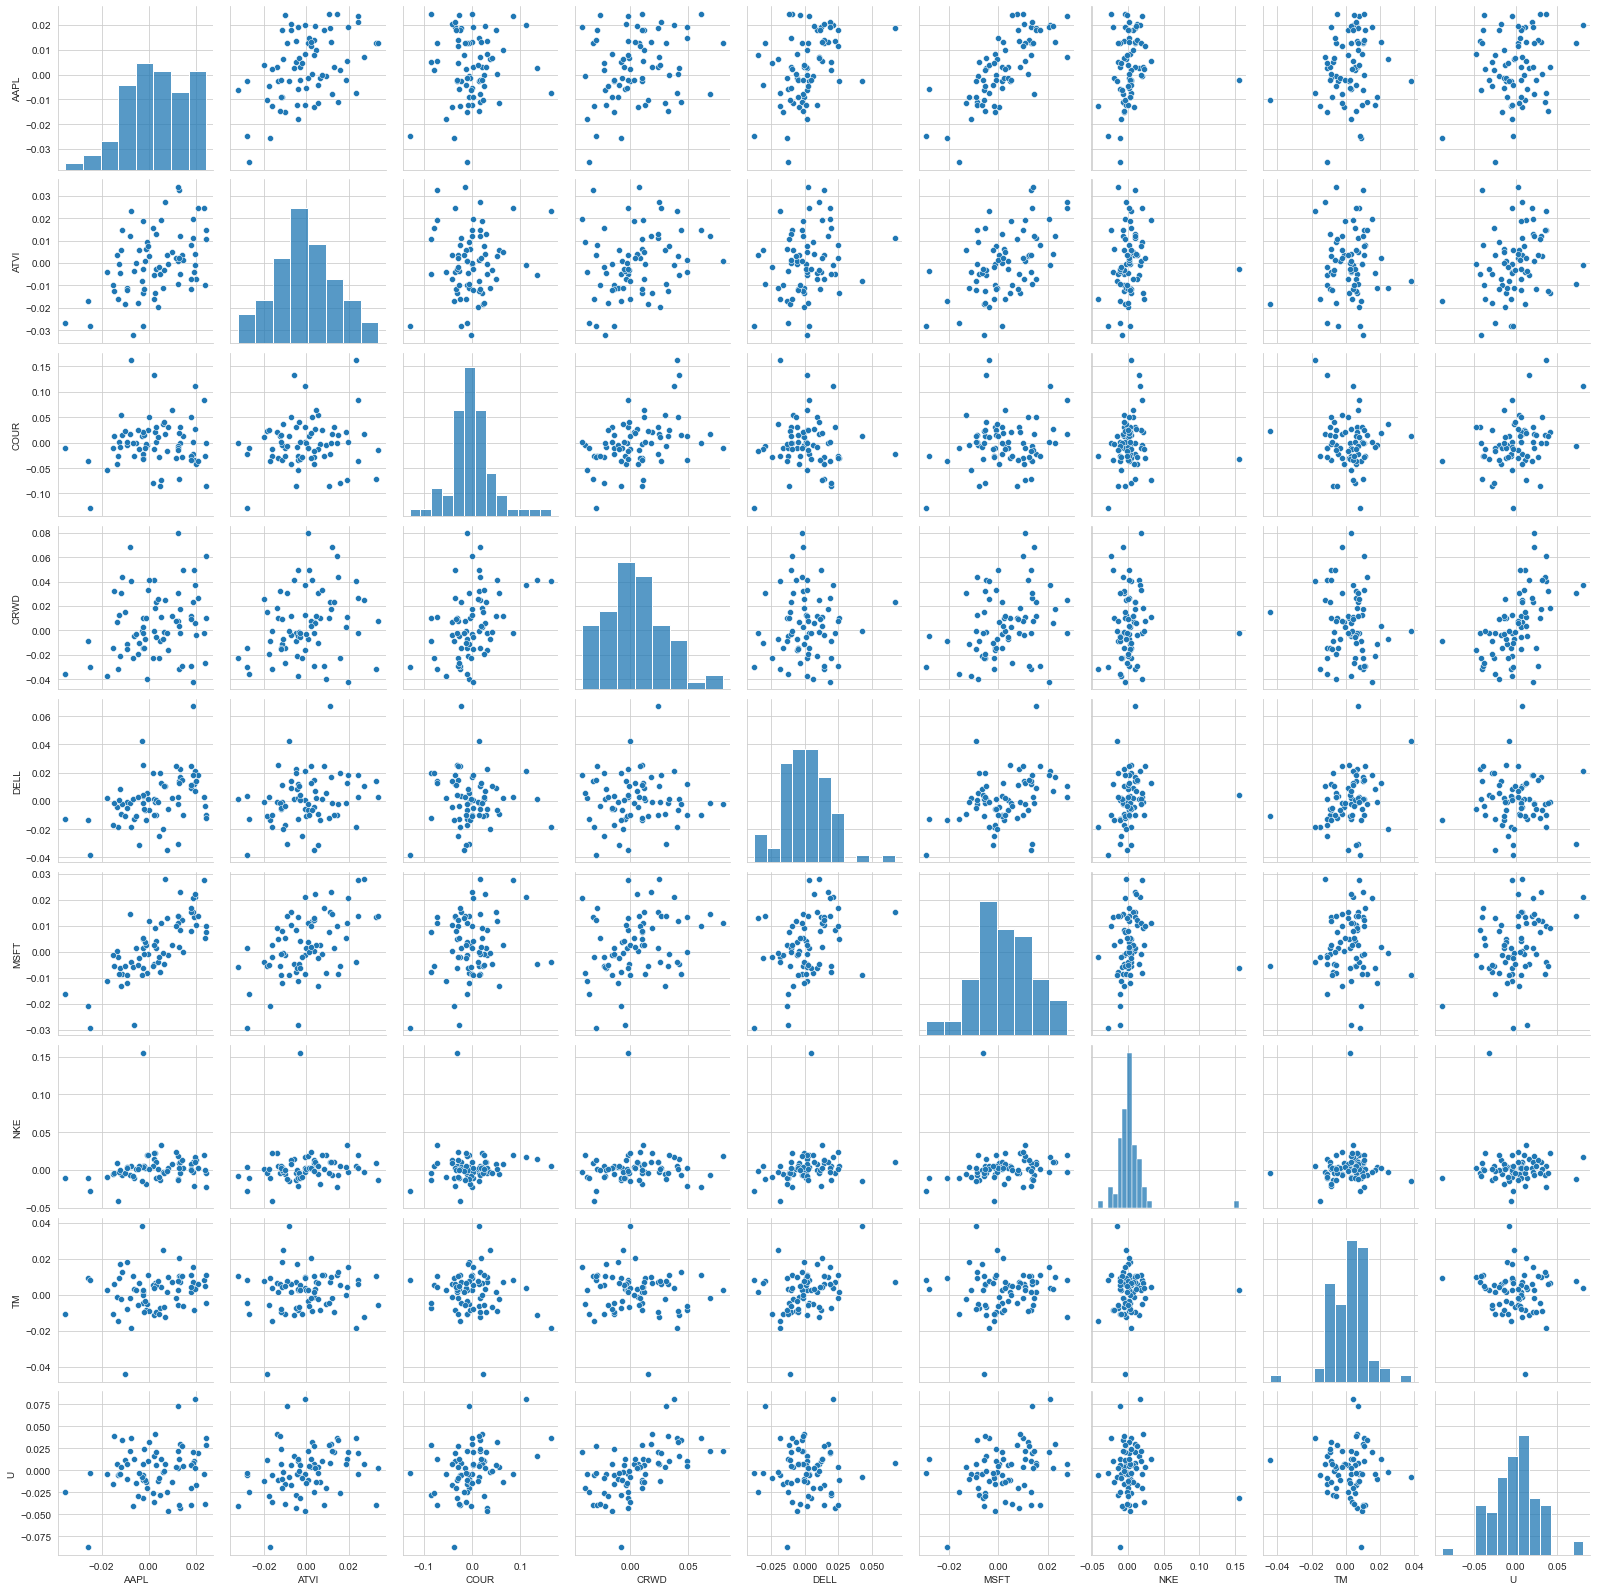

<Figure size 432x288 with 0 Axes>

In [227]:
sns.pairplot(daily_returns.dropna())
plt.show()
plt.savefig('daily_returns')

## Compare different stonks daily returns

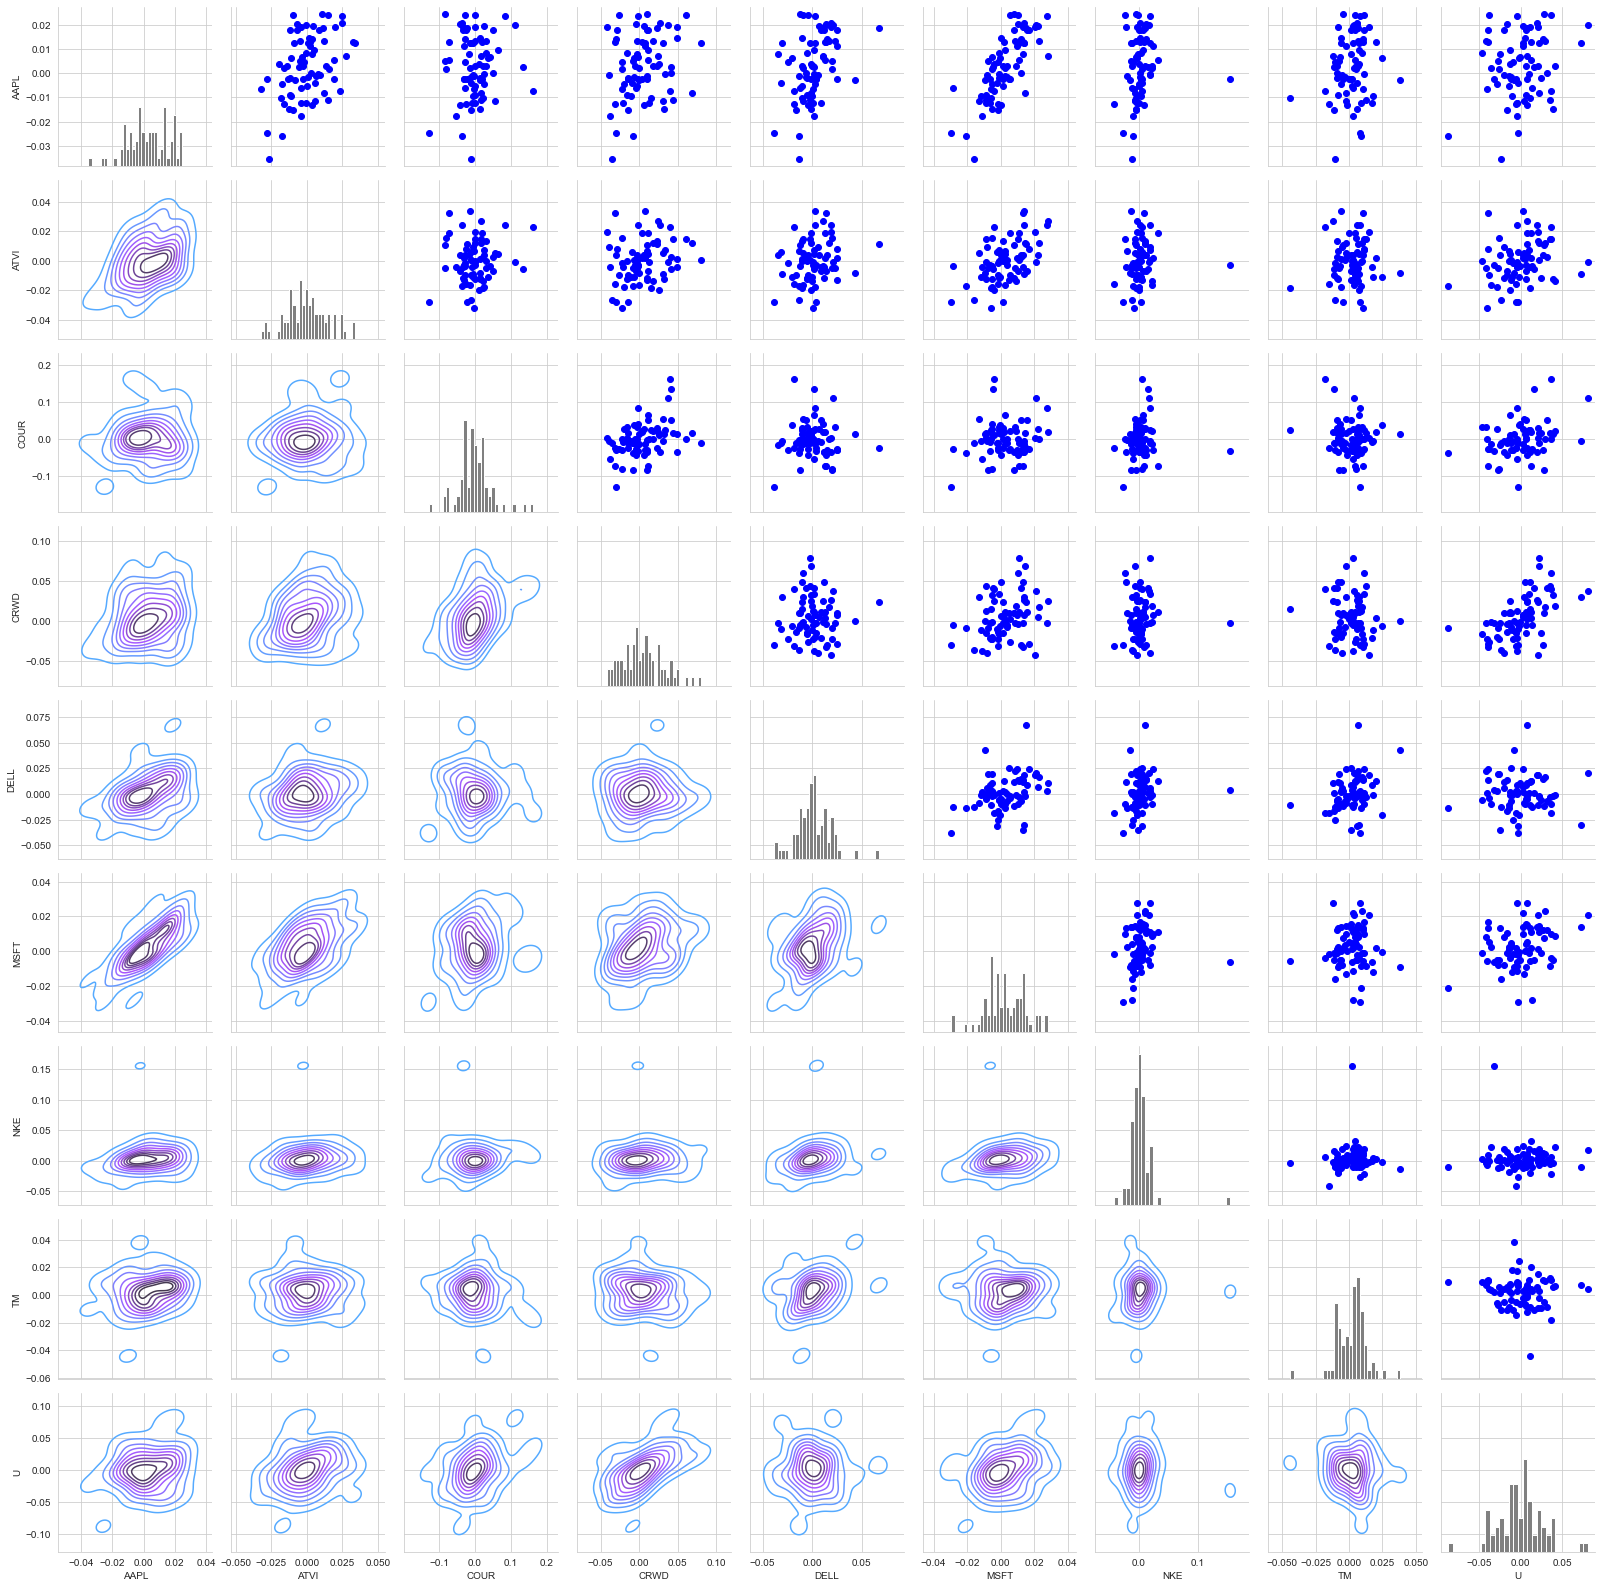

In [228]:
daily_returns_fig = sns.PairGrid(daily_returns.dropna())
daily_returns_fig.map_upper(plt.scatter, color='blue')
daily_returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
daily_returns_fig.map_diag(plt.hist, bins=30, color='grey')
plt.show()

## Risk Analysis

### Analyse risk of a stock

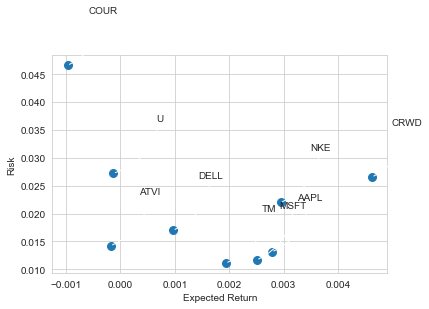

In [244]:
area = np.pi*20
ret = daily_returns.dropna()

plt.scatter(ret.mean(), ret.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (50, 50),
        textcoords = 'offset points', 
        ha = 'right', 
        va = 'bottom', 
        arrowprops = dict(
            arrowstyle = '-', 
            connectionstyle = 'arc3, rad=-0.3'
        )
    )

### Value at Risk

/Users/aperkslabbe/opt/anaconda3/envs/stonk_analysis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NKE


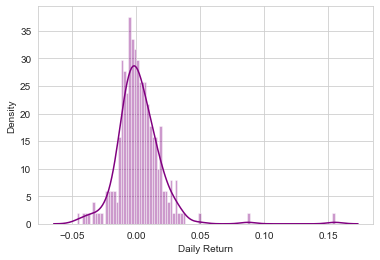

In [252]:
sns.distplot(sdf['Daily Return'].dropna(), bins=100, color='purple')
print(stonk)
plt.show()

In [253]:
ret.head()

,AAPL,ATVI,COUR,CRWD,DELL,MSFT,NKE,TM,U
Date,,,,,,,,,
2021-04-01,0.006959,0.027312,0.017333,0.024766,0.010550,0.027909,-0.002709,-0.012175,0.007676
2021-04-05,0.023577,0.024388,0.083661,-0.002192,0.003143,0.027728,0.019543,0.007914,-0.004749
2021-04-06,0.002462,-0.005620,0.133441,0.041582,0.001343,-0.004858,0.015098,-0.011134,0.016203
2021-04-07,0.013390,-0.004932,0.031478,-0.002315,0.022687,0.008230,-0.004520,0.006834,-0.042453
2021-04-08,0.019234,-0.003924,-0.034483,0.049090,0.011693,0.013405,-0.020946,-0.008533,0.010726


In [254]:
# Quantile Method
ret[stonk].quantile(0.05)

-0.019886262237195897

In [255]:
# Monte Carlo method
days = 365
dt = 1 / days
mu = ret.mean()[stonk]
sigma = ret.std()[stonk]

In [256]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days): 
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [257]:
sdf.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-07-16,97.500000,98.230003,97.040001,97.260002,96.459023,3594700,NaN,NaN,NaN,NaN
2020-07-17,96.949997,97.230003,96.040001,96.279999,95.487091,7405700,NaN,NaN,NaN,-0.010076
2020-07-20,95.500000,96.349998,95.110001,95.650002,94.862282,5822300,NaN,NaN,NaN,-0.006543
2020-07-21,96.919998,99.000000,96.099998,98.360001,97.549965,5855600,NaN,NaN,NaN,0.028332
2020-07-22,98.160004,98.989998,97.910004,98.910004,98.095444,4097000,NaN,NaN,NaN,0.005592


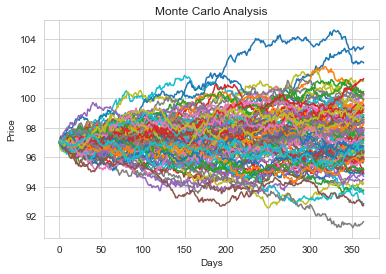

In [258]:
start_price = 97

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')
plt.show()

In [259]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

Text(0.5, 1.0, 'Final price distribution for NKE stonks after $ 365ays')

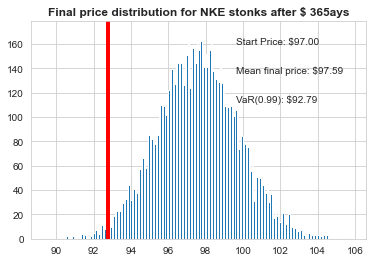

In [260]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

# Starting price
plt.figtext(0.6, 0.8, s="Start Price: $%.2f"%start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f"%simulations.mean())

# Variance of the price 99% confidence
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f"%q)

# Plot a line at the 1% quantitle result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for NKE stonks after $% days"%days, weight='bold')